In [17]:
# Importing Libraries
import ast
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
df_us =df[(df['job_title']== 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [19]:
df_us = df_us.dropna(subset='salary_year_avg')

In [20]:
df_us=df_us.explode('job_skills')

In [21]:
df_us_group = df_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_us_group_skills =df_us_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

df_us_group_toppay = df_us_group.sort_values(by='median',ascending=False).head(10)

In [22]:
df_us_group_skills

,count,median
job_skills,,
aws,75,92500.0
python,408,90000.0
tableau,398,90000.0
r,244,90000.0
sql,714,87500.0
power bi,279,87500.0
sas,200,84078.5
excel,472,77500.0
powerpoint,102,77500.0


In [24]:
df_us_group_toppay

,count,median
job_skills,,
golang,1,145000.0
redis,1,128500.0
elasticsearch,3,128500.0
dynamodb,1,115000.0
mongodb,14,115000.0
jupyter,5,115000.0
bitbucket,1,111175.0
ssis,23,110000.0
gcp,12,106250.0


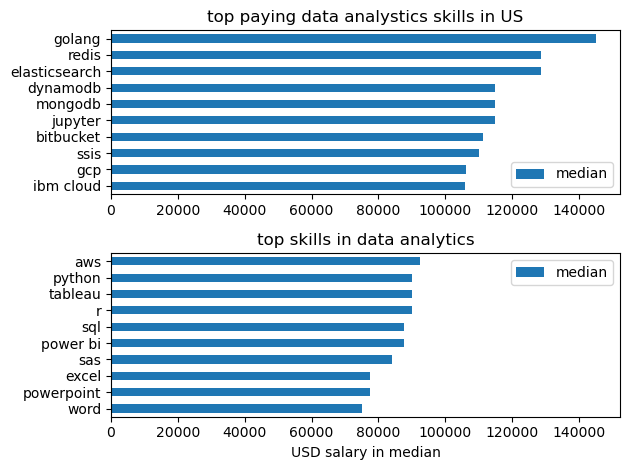

In [23]:
fig, ax = plt.subplots (2,1)

df_us_group_toppay[::-1].plot(kind='barh' , y='median', ax=ax[0])
ax[0].set_title('top paying data analystics skills in US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

df_us_group_skills[::-1].plot(kind='barh' , y='median', ax=ax[1])
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('USD salary in median')
ax[1].set_ylabel('')
ax[1].set_title('top skills in data analytics')

fig.tight_layout()